In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simnn import Model
from simnn import Linear, PM_BN
from simnn import ReLU, Softmax
from simnn import CrossEntropy

from simnn.utils import one_hot

from dataset.mnist.mnist import load_mnist_data
from dataset.utils import *

In [2]:
# Extract data
((X_train, Y_train), (X_test, Y_test)) = load_mnist_data('dataset/mnist/')

[X_train, X_test] = d_range([X_train, X_test])  # put data values \in [-1, 1]

# create training / validatin data split
((X_train, Y_train), (X_val, Y_val)) = train_val_split((X_train, Y_train), 1 / 6)

t_train = one_hot(Y_train, m=10)
t_test = one_hot(Y_test, m=10)
t_val = one_hot(Y_val, m=10)

dataset = (X_train, t_train)
val_set = (X_val, t_val)

In [3]:
num_hidden_units = [8, 16, 32, 64, 128]
val_accuracy = []
for nh in num_hidden_units:
    # define model structure
    layers = [Linear(out_shape=nh, activation=ReLU(), bias=True, init='lecun_normal'),
              Linear(out_shape=10, activation=Softmax(), bias=True, init='lecun_normal')]

    # instantiate model
    model = Model(layers, dataset, CrossEntropy(), class_task=True)
    
    # fit model to datas
    model.fit(dataset,  num_epochs=128, val_set=val_set, initial_learn=1e-3,
              aneal_T=30, shuffle=True, b_size=128, verbose=True,
              early_stop_eps=1e-32, min_epochs=32, e_stop_n=3, e_stop=True)

    v_acc_nh = model._accuracy_rate(t_val, model.net_fprop(X_val))
    
    val_accuracy += [v_acc_nh]
    print('\nWith {} hidden layers Validation Acc {:.4}\n'.format(nh, v_acc_nh))

/Users/vchiley/SIMNN/simnn/model.py:155: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 76, time: 59.22s, with train cost 1.538, Train Acc 0.4008, Val Acc 0.4063
Stopping Early!!!!

With 8 hidden layers Validation Acc 0.4063

Epoch: 85, time: 87.93s, with train cost 0.2441, Train Acc 0.9285, Val Acc 0.9241
Stopping Early!!!!

With 16 hidden layers Validation Acc 0.9241

Epoch: 35, time: 36.7s, with train cost 0.2429, Train Acc 0.9291, Val Acc 0.92318
Stopping Early!!!!

With 32 hidden layers Validation Acc 0.9231

Epoch: 58, time: 81.1s, with train cost 0.04032, Train Acc 0.9887, Val Acc 0.96615
Stopping Early!!!!

With 64 hidden layers Validation Acc 0.9661

Epoch: 50, time: 102.8s, with train cost 0.0118, Train Acc 0.9985, Val Acc 0.97786
Stopping Early!!!!

With 128 hidden layers Validation Acc 0.9778



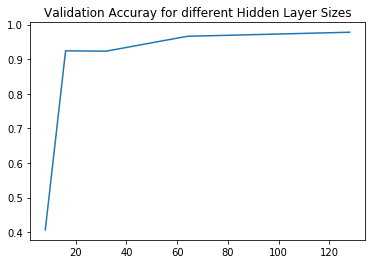

In [4]:
plt.plot(num_hidden_units, val_accuracy)
plt.title('Validation Accuray for different Hidden Layer Sizes')
plt.show()

In [5]:
num_hidden_units = [8, 16, 32, 64, 128]
val_accuracy_b = []
for nh in num_hidden_units:
    # define model structure
    layers = [Linear(out_shape=nh, activation=ReLU(), bias=True, init='lecun_normal'),
              PM_BN(nh),
              Linear(out_shape=10, activation=Softmax(), bias=True, init='lecun_normal')]

    # instantiate model
    model = Model(layers, dataset, CrossEntropy(), class_task=True)
    
    # fit model to datas
    model.fit(dataset,  num_epochs=128, val_set=val_set, initial_learn=1e-3,
              aneal_T=30, shuffle=True, b_size=128, verbose=True,
              early_stop_eps=1e-32, min_epochs=32, e_stop_n=3, e_stop=True)

    v_acc_nh = model._accuracy_rate(t_val, model.net_fprop(X_val))
    
    val_accuracy_b += [v_acc_nh]
    print('\nWith {} hidden layers Validation Acc {:.4}\n'.format(nh, v_acc_nh))

/Users/vchiley/SIMNN/simnn/model.py:155: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 47, time: 40.15s, with train cost 0.6204, Train Acc 0.8114, Val Acc 0.8239
Stopping Early!!!!

With 8 hidden layers Validation Acc 0.8239

Epoch: 42, time: 39.86s, with train cost 0.1466, Train Acc 0.9567, Val Acc 0.9473
Stopping Early!!!!

With 16 hidden layers Validation Acc 0.9473

Epoch: 62, time: 65.0s, with train cost 0.04482, Train Acc 0.9874, Val Acc 0.96478
Stopping Early!!!!

With 32 hidden layers Validation Acc 0.9647

Epoch: 55, time: 86.28s, with train cost 0.01631, Train Acc 0.9963, Val Acc 0.9738
Stopping Early!!!!

With 64 hidden layers Validation Acc 0.9738

Epoch: 44, time: 94.73s, with train cost 0.01224, Train Acc 0.998, Val Acc 0.97793
Stopping Early!!!!

With 128 hidden layers Validation Acc 0.977



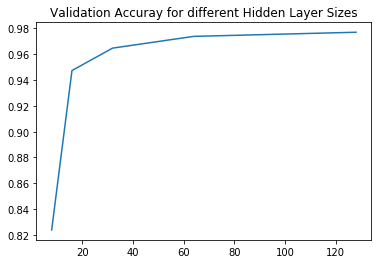

In [6]:
plt.plot(num_hidden_units, val_accuracy_b)
plt.title('Validation Accuray for different Hidden Layer Sizes')
plt.show()

### Network Parameter Selection
Training the different network settings till convergence, there are 3 network settings which go above 97% accuracy on the validation set:

Without PM_BN:  
    1. # Hidden Units = 128  
With PM_BN:  
    1. # Hidden Units = 64  
    2. # Hidden Units = 128  

We will deploy the network with 64 Hidden units, which includes PM_BN. This network is trained and tested below.

In [7]:
nh = 64
# define model structure
layers = [Linear(out_shape=nh, activation=ReLU(), bias=True, init='lecun_normal'),
          PM_BN(nh),
          Linear(out_shape=10, activation=Softmax(), bias=True, init='lecun_normal')]

# instantiate model
model = Model(layers, dataset, CrossEntropy(), class_task=True)

print(model)

Model, in_shape: 784, out_shape: 10, 
with layers:
Linear Layer, in_shape: 784, out_shape: 64, and has bias: True, 
ReLU
PM_BN, Linear Layer, in_shape: 64, out_shape: 10, and has bias: True, 
Softmax, shortcut: True, n_stable: True
and cost: CrossEntropyCost



In [8]:
# fit model to datas
model.fit(dataset,  num_epochs=128, val_set=val_set, initial_learn=1e-3,
          aneal_T=30, shuffle=True, b_size=128, verbose=True, e_stop=False)

/Users/vchiley/SIMNN/simnn/model.py:155: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 127, time: 193.4s, with train cost 0.007584, Train Acc 0.9994, Val Acc 0.9704

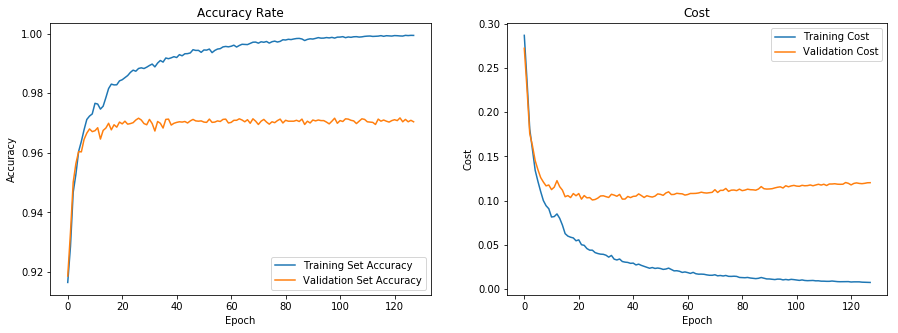

Final Training Accuracy Rate: 0.9994%
Final Validation Accuracy Rate: 0.9704%
Final Training Cost: 0.0075836
Final Validation Cost: 0.12025


In [9]:
# plot Accuracies and Costs for Training and Validation set
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(model.acc_e, label='Training Set Accuracy')
ax1.plot(model.v_acc_e, label='Validation Set Accuracy')
ax1.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Rate')
ax2.plot(model.cost_e, label='Training Cost')
ax2.plot(model.v_cost_e, label='Validation Cost')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost')
ax2.set_title('Cost')
plt.show()

print("Final Training Accuracy Rate: {:.5}%".format(model.acc_e[-1]))
print("Final Validation Accuracy Rate: {:.5}%".format(model.v_acc_e[-1]))

print("Final Training Cost: {:.5}".format(model.cost_e[-1]))
print("Final Validation Cost: {:.5}".format(model.v_cost_e[-1]))

In [10]:
test_accuracy = model._accuracy_rate(t_test, model.net_fprop(X_test))
print("Final Test Set Accuracy Rate: {:.5}%".format(test_accuracy))

Final Test Set Accuracy Rate: 0.9707%
